<a href="https://colab.research.google.com/github/dbwilburn/BIOC6765/blob/main/biochem6765_example_butterfly_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Butterfly Example Notebook

This notebook shows an example of how to read in a .mgf file, which is a text-based format used to store mass spectrometry (MS) data. To read in the .mgf file, we will be using the proteomics library pyteomics. To pip install this library, run the code block shown below (if you already have this package installed, comment this line out). After we read in the mass spretrometry data, we will make an example butterfly plot of the fragmentation pattern of an experimental spectrum and the predicted spectrum for that peptide.

In [ ]:
!pip install pyteomics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 kB 5.1 MB/s eta 0:00:00


In [ ]:
# import packages
from pyteomics import mgf # function that will help read in the .msg file
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

In [ ]:
# first, let's read in our .mgf file and store that data into a list of dictionaries
# for this example, we will be using the following .mgf file

mgf_url = "https://raw.githubusercontent.com/dbwilburn/BIOC5721/main/biochem6765_HW5_sample.mgf"
mgf_file = "sample.mgf"

# Download the file
response = requests.get(mgf_url)
if response.status_code == 200:
    with open(mgf_file, "wb") as f:
        f.write(response.content)
    print(f"Downloaded {mgf_file}")
else:
    print("Failed to download the file. Check the URL.")

# Read the .mgf file with Pyteomics
spectra_list = []
with mgf.read(mgf_file) as spectra:
    for spectrum in spectra:
        spectra_list.append(spectrum)

print(f"Total spectra read: {len(spectra_list)}")

print(spectra_list[0]['params'])
print(spectra_list[1]['params'])

Downloaded sample.mgf
Total spectra read: 2
{'title': 'Scan 1', 'pepmass': (565.291, None), 'charge': [2], 'rtinseconds': 1906.72}
{'title': 'EIGINAYGHR +2', 'pepmass': (565.291, None), 'charge': [2]}


Okay -- it looks like we successfully read in the .mgf file as a list of dictionries. This file contains two spectra -- the first in an experimental sprectrum for the peptide EIGINAYGHR +2 (spectra_list[0]) and the second is the predicted spectrum of the same peptide (spectra_list[1]). Each peptide dictionary has the folowing keys:

In [ ]:
print(spectra_list[0].keys())

dict_keys(['params', 'm/z array', 'intensity array', 'charge array'])


Using this data, we will construct a buttefly plot that of the experimental and predicted spectra.

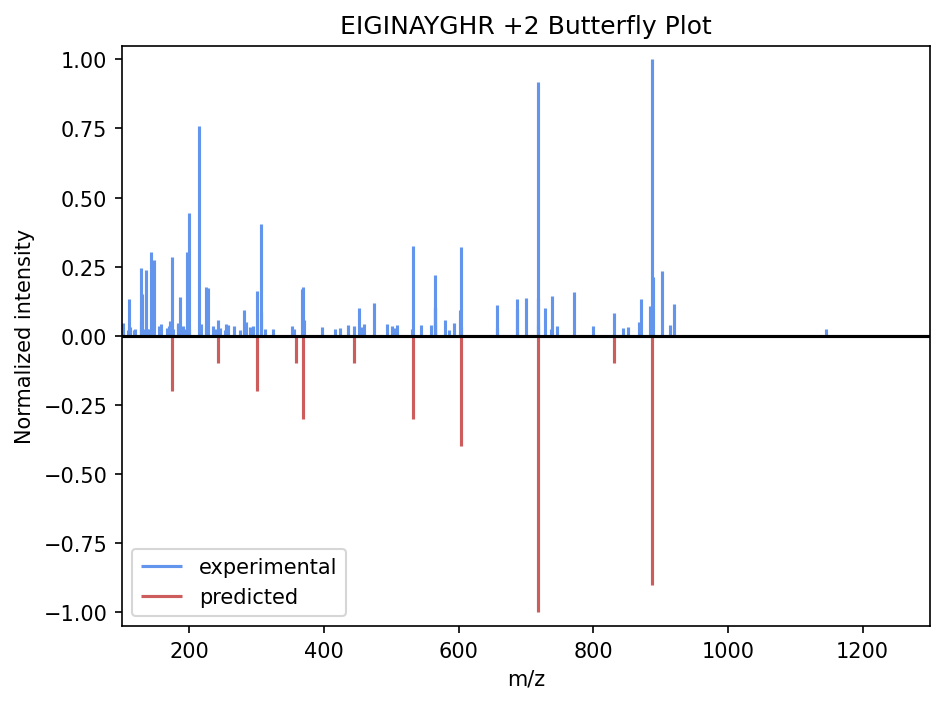

In [ ]:
# get experimental mz and intensity data
experimental_mz = spectra_list[0]['m/z array']
experimental_intensity = spectra_list[0]['intensity array']
experimental_intensiry_normalized = experimental_intensity / np.max(experimental_intensity) # normalize intensities to max intensity = 1

# get predicted mz and intensity data
predicted_mz = spectra_list[1]['m/z array']
predicted_intensity = spectra_list[1]['intensity array'] # no normalization needed because the predicted spectrum is already normalized

fig, ax = plt.subplots(dpi = 150)

# plot experimental data
ax.vlines(experimental_mz, 0, experimental_intensiry_normalized, color='cornflowerblue', label='experimental')

# plot predicted data
ax.vlines(predicted_mz, 0, -1*predicted_intensity, color='indianred', label='predicted') # multiply intensities by -1 so they plot below

# add line at y = 0
ax.plot([0, 1500], [0, 0], color='k')

# set axes limits
ax.set_xlim(100, 1300) # change axis as needed
ax.set_ylim(-1.05, 1.05)

# label axes
ax.set_xlabel('m/z')
ax.set_ylabel('Normalized intensity')

# show legend
ax.legend(loc = 'lower left')

# add title
ax.set_title('EIGINAYGHR +2 Butterfly Plot')

plt.tight_layout()